In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

import xgboost as xgb
from datetime import time

/Users/bart/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
ds = pd.read_csv('datasets/gym_dataset.csv')

In [3]:
ds.head(2)

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,2015-08-14 17:00:11-07:00,61211,4,0,0,71.76,0,0,8,17
1,45,2015-08-14 17:20:14-07:00,62414,4,0,0,71.76,0,0,8,17


In [4]:
ds = ds.drop(['date', 'timestamp'], axis=1)

X = ds.drop('number_people', axis=1).values
y = ds.number_people.values
X.shape, y.shape

((62184, 8), (62184,))

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.4, 
                                                    random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((37310, 8), (24874, 8), (37310,), (24874,))

In [6]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [7]:
params = {
    'objective': 'reg:linear',
    'n_estimators': 20,
    'max_depth': 40,
    'eta': 0.4,
    'gamma': 20        
}

num_rounds = 12
watchlist  = [(dtest,'test'), (dtrain,'train')]
bst = xgb.train(params, dtrain, num_rounds, watchlist)

[0]	test-rmse:23.4325	train-rmse:23.4027
[1]	test-rmse:15.8849	train-rmse:15.5442
[2]	test-rmse:11.5132	train-rmse:10.8265
[3]	test-rmse:9.04636	train-rmse:8.00626
[4]	test-rmse:7.73521	train-rmse:6.4071
[5]	test-rmse:7.09835	train-rmse:5.54737
[6]	test-rmse:6.80955	train-rmse:5.11581
[7]	test-rmse:6.68267	train-rmse:4.90191
[8]	test-rmse:6.63788	train-rmse:4.80225
[9]	test-rmse:6.62126	train-rmse:4.75284
[10]	test-rmse:6.61809	train-rmse:4.72823
[11]	test-rmse:6.61713	train-rmse:4.71436


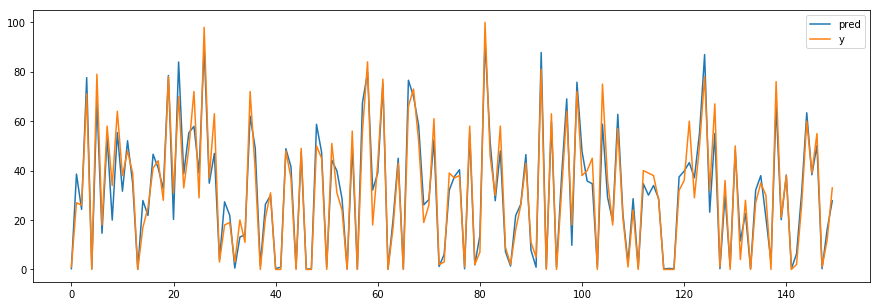

In [8]:
datapoints = 150
plt.figure(figsize=(15, 5))
plt.plot(bst.predict(dtest)[:datapoints])
plt.plot(y_test[:datapoints])
plt.legend(['pred', 'y'])

In [9]:
r2_score(y_test, bst.predict(dtest))

0.91535012532041637